rms error chebyshev approximation: 0.5918563785713568
max error chebyshev approximation: 1.1371976709835607
rms error linear least square fit: 5.278181875389455e-05
max error linear least square fit: 0.00020209350456190656


C:\Users\ngren\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log2
  if __name__ == '__main__':


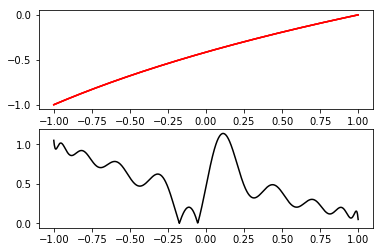

In [122]:
import numpy as np
from numpy.polynomial import chebyshev
import matplotlib.pyplot as plt
import math

a = 0.5
b = 1
def fun(x):
    return np.log2(x)


# lagrange-chebyshev fit

# chebyshev polynomial fit

def get_cheb_mat(x, order): # return chebyshev polynomial evaluations
    T = np.zeros([x.size, order])
    
    # first two evaluations
    T[:,0] = 1.0
    if (order > 1):
        T[:,1] = x
    
    # chebyshev recurrence relation
    for i in range (1, order-1):
        T[:,1+i] = 2*x*T[:,i] - T[:,i-1]
            
    return np.matrix(T)

def get_cheb_coeff(order, func):
    c = np.zeros(order)
    for i in range (order):
        for j in range (order):
            c[i] += fun(np.cos(np.pi*(j+0.5))/order) * np.cos(np.pi*i*(j+0.5))/order
    c *= 2.0/order
    return c
        
# wrapper chebyshev fit with clenshaw's recurrence
def cheb_fit_clen(a, b, x, order, func):
    
    N = len(x)
    c = get_cheb_coeff(order, func)
    m = order
    d = np.zeros([N,m+2])
    d_2 = np.zeros(N) # y_n+2
    d_1 = np.zeros(N) # y_n+1
        
    for c in (c[::-1]):
        (d_1, d_2) = (2*np.multiply(x,d_1) - d_2 + c, d_1) # chebyshev recurrence
    
    c_left = np.full(N,0.5*c)
    return np.multiply(x,d_1) - d_2 + c_left

# rms error
def rms_err(x, y, py):
    n = len(x)
    rms = 0
    for i in range (n):
        rms += (py[i] - y[i])**2
    rms /= n
    rms = np.sqrt(rms)
    return rms

# max error
def max_err(x, y, py):
    maxerr = 0
    for i in range (len(x)):
        err = np.abs(py[i]-y[i])
        if (err > maxerr):
            maxerr = err
    return maxerr

# error print

order = 6
n = 1000
x = np.linspace(a,b,n)
y = fun(x)
x = (2*x-a-b)/(b-a) # scale to [-1,1]
y_new = cheb_fit_clen(a,b,x,order,fun)

# least square fit
lorder = 4
pfit = np.polyfit(x, y, lorder)
ly = np.polyval(pfit, x)

print("rms error chebyshev approximation: " + str(rms_err(x, y, py)))
print("max error chebyshev approximation: " + str(max_err(x, y, py)))
print("rms error linear least square fit: " + str(rms_err(x, y, ly)))
print("max error linear least square fit: " + str(max_err(x, y, ly)))

ax1=plt.subplot(211)
plt.plot(x, y, 'r-')
plt.plot(x, y_new, 'k-')

ax2=plt.subplot(212, sharex=ax1)
plt.plot(x,np.abs(y-py), 'k-')
plt.show()